<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-05-15 12:34:30--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv.7’

survey-data.csv.7   100%[===================>] 152.13M  59.5MB/s    in 2.6s    

2025-05-15 12:34:34 (59.5 MB/s) - ‘survey-data.csv.7’ saved [159525875/159525875]



**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [2]:
!pip install pandas 
!pip install numpy
!pip install matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 151.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 169.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 161.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 139.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 78.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 131.3 MB/s eta 0:00:00


**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [3]:
df = pd.read_csv("Lab 13.csv")
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,SurveyEase,ConvertedCompYearly,JobSat,ConvertedCompYearly_MinMax,ConvertedCompYearly_Zscore,Log_ConvertedCompYearly,ExperienceLevel,ExperienceRange,TipoEmpleoAgrupado,AgeNumeric
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Senior,10-20,Full time,16.0
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Expert,10-20,Full time,39.5
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,Easy,NaN,NaN,NaN,NaN,NaN,Expert,20+,Full time,49.5
3,4,I am learning to code,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Other...,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,Easy,NaN,NaN,NaN,NaN,NaN,Senior,10-20,Full time,21.0
4,5,I am a developer by profession,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Other...,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,Easy,NaN,NaN,NaN,NaN,NaN,Senior,10-20,Full time,21.0


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [4]:
import sqlite3

conn = sqlite3.connect('survey-data.sqlite')

df.to_sql('main', conn, if_exists='replace', index=False)

conn.close()

**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [5]:
conn = sqlite3.connect('survey-data.sqlite')

QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

df_check.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,SurveyEase,ConvertedCompYearly,JobSat,ConvertedCompYearly_MinMax,ConvertedCompYearly_Zscore,Log_ConvertedCompYearly,ExperienceLevel,ExperienceRange,TipoEmpleoAgrupado,AgeNumeric
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,None,...,None,None,None,None,None,None,Senior,10-20,Full time,16.0
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,None,None,None,None,None,None,Expert,10-20,Full time,39.5
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,Easy,None,None,None,None,None,Expert,20+,Full time,49.5
3,4,I am learning to code,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Other...,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,Easy,None,None,None,None,None,Senior,10-20,Full time,21.0
4,5,I am a developer by profession,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Other...,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,Easy,None,None,None,None,None,Senior,10-20,Full time,21.0


## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [6]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()

,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [7]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)

,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [8]:
QUERY = """
SELECT Age, COUNT(*) as Count
FROM main
GROUP BY Age
ORDER BY Count DESC
"""
pd.read_sql_query(QUERY, conn)

,Age,Count
0,25-34 years old,24233
1,35-44 years old,14942
2,18-24 years old,14098
3,45-54 years old,6249
4,55-64 years old,2575
5,Under 18 years old,2568
6,65 years or older,772


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [9]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])

CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" REAL,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


In [10]:
QUERY = """
SELECT CompTotal, COUNT(*) as Count
FROM main
WHERE CompTotal IS NOT NULL
GROUP BY CompTotal
ORDER BY Count DESC
"""
df = pd.read_sql_query(QUERY, conn)
df.head(5)

,CompTotal,Count
0,100000.0,939
1,60000.0,839
2,120000.0,793
3,80000.0,728
4,50000.0,705


In [11]:
Q1 = df["CompTotal"].quantile(0.25)
Q3 = df["CompTotal"].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

new_df = df[(df["CompTotal"] >= limite_inferior) & (df["CompTotal"] <= limite_superior)]

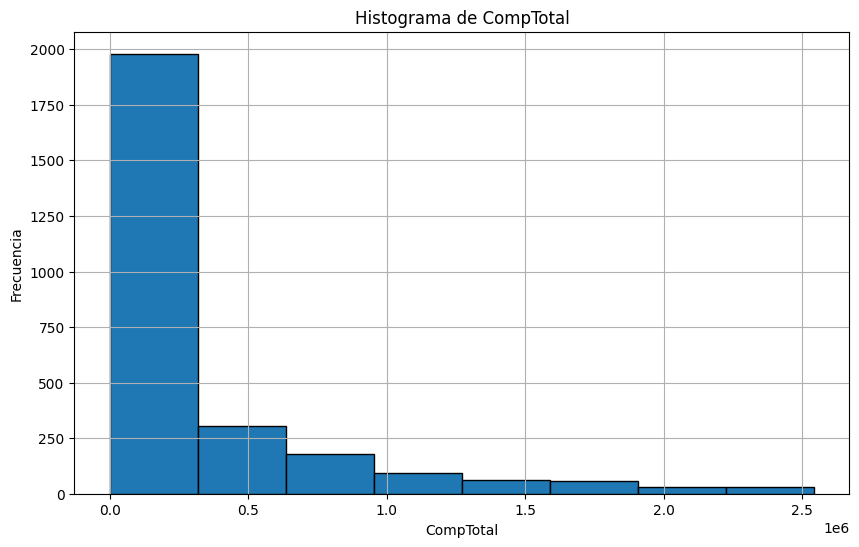

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(new_df["CompTotal"], bins=8, edgecolor='black')
plt.title("Histograma de CompTotal")
plt.xlabel("CompTotal")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

**Box Plots**

Plot a box plot of Age.


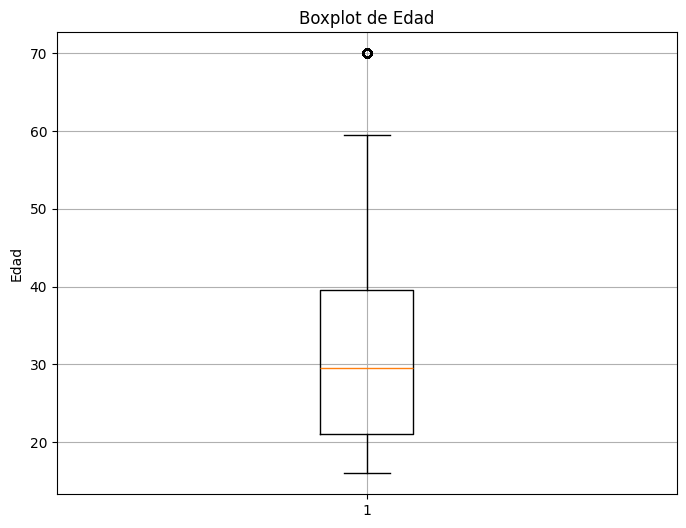

In [13]:
QUERY = """
SELECT AgeNumeric
FROM main
WHERE AgeNumeric IS NOT NULL
"""

new_df = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(8, 6))
plt.boxplot(new_df["AgeNumeric"])
plt.title("Boxplot de Edad")
plt.ylabel("Edad")
plt.grid(True)
plt.show()

### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


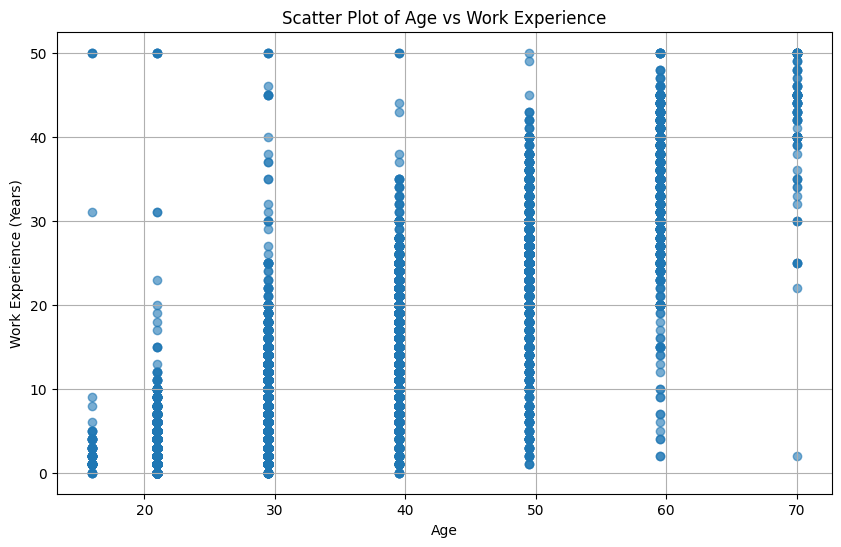

In [14]:
QUERY = """
SELECT AgeNumeric, WorkExp
FROM main
WHERE AgeNumeric IS NOT NULL AND WorkExp IS NOT NULL
"""
new_df = pd.read_sql_query(QUERY,conn)

plt.figure(figsize=(10, 6))
plt.scatter(new_df["AgeNumeric"], new_df["WorkExp"], alpha=0.6)
plt.title("Scatter Plot of Age vs Work Experience")
plt.xlabel("Age")
plt.ylabel("Work Experience (Years)")
plt.grid(True)
plt.show()

### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


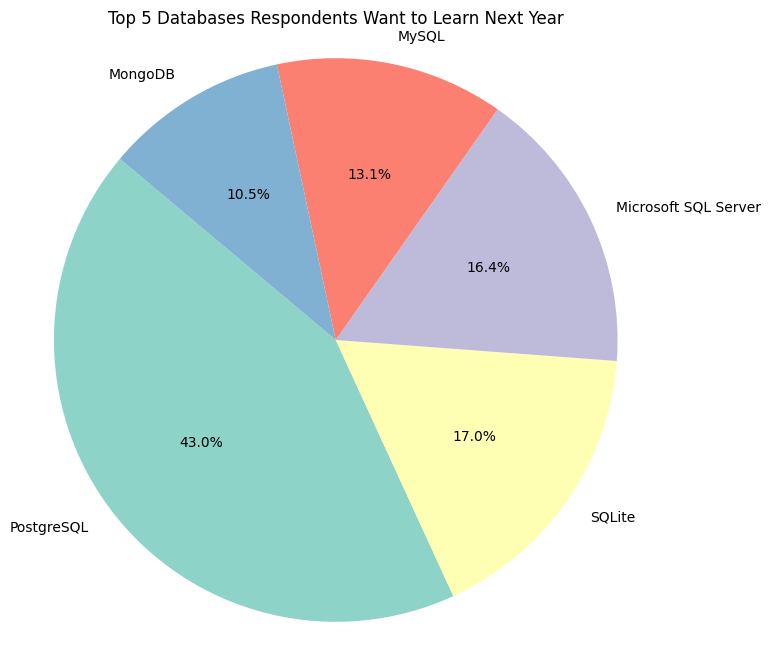

In [26]:
QUERY = """
SELECT DatabaseWantToWorkWith, COUNT (*) as Count
FROM main
WHERE DatabaseWantToWorkWith IS NOT NULL
GROUP BY DatabaseWantToWorkWith
ORDER BY COUNT DESC
"""
z = pd.read_sql_query(QUERY,conn)
Z = z.head(6)
Z = Z[Z['DatabaseWantToWorkWith'] != 'PostgreSQL;SQLite']

plt.figure(figsize=(8, 8))
plt.pie(Z["Count"].values, labels=Z["DatabaseWantToWorkWith"], autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Top 5 Databases Respondents Want to Learn Next Year')
plt.axis('equal')
plt.show()

**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


In [49]:
QUERY = """
SELECT Age, TimeSearching, TimeAnswering
FROM main
WHERE Age IS NOT NULL AND TimeSearching IS NOT NULL AND TimeAnswering IS NOT NULL
"""
Y=pd.read_sql_query(QUERY,conn)

TimeSearching_map = {
    'Less than 15 minutes a day': 7.5,
    '15-30 minutes a day': 22.5,
    '30-60 minutes a day': 45,
    '60-120 minutes a day': 90,
    'Over 120 minutes a day': 150
}

TimeAnswering_map = {
    'Less than 15 minutes a day': 7.5,
    '15-30 minutes a day': 22.5,
    '30-60 minutes a day': 45,
    '60-120 minutes a day': 90,
    'Over 120 minutes a day': 150
}

Y['TimeSearching'] = Y['TimeSearching'].map(TimeSearching_map)
Y['TimeAnswering'] = Y['TimeAnswering'].map(TimeAnswering_map)

age_order = [
    "Under 18 years old", 
    "18-24 years old", 
    "25-34 years old", 
    "35-44 years old", 
    "45-54 years old", 
    "55-64 years old", 
    "65 years or older"
]

Y['Age'] = pd.Categorical(Y['Age'], categories=age_order, ordered=True)

grouped = Y.groupby('Age')[['TimeSearching', 'TimeAnswering']].mean()

/tmp/ipykernel_300/2614373956.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = Y.groupby('Age')[['TimeSearching', 'TimeAnswering']].mean()


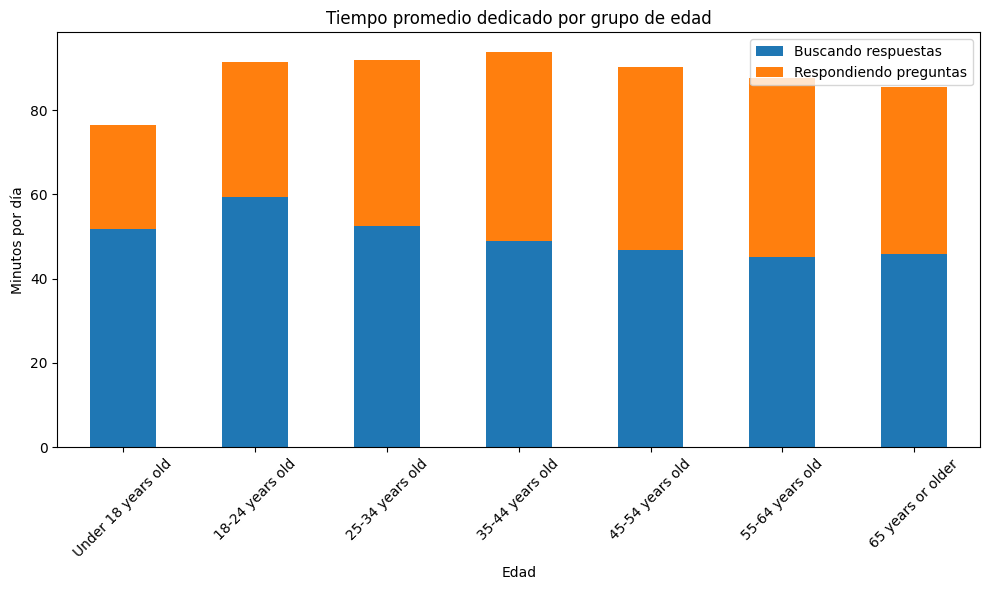

In [51]:
grouped.sort_index(inplace=True)
grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])

plt.title('Tiempo promedio dedicado por grupo de edad')
plt.xlabel('Edad')
plt.ylabel('Minutos por día')
plt.legend(['Buscando respuestas', 'Respondiendo preguntas'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


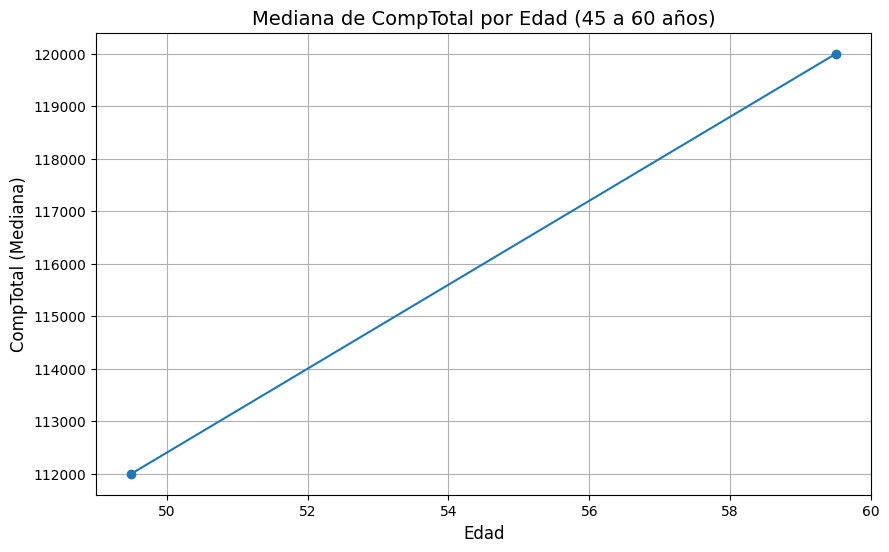

In [68]:
QUERY = """
SELECT AgeNumeric, CompTotal
FROM main
WHERE Age BETWEEN 45 AND 60 AND CompTotal IS NOT NULL
"""
X = pd.read_sql_query(QUERY,conn)

Q1 = X["CompTotal"].quantile(0.25)
Q3 = X["CompTotal"].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

X = X[(X["CompTotal"] >= limite_inferior) & (X["CompTotal"] <= limite_superior)]

X = X.groupby('AgeNumeric')['CompTotal'].median().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(X["AgeNumeric"], X["CompTotal"], marker='o', linestyle='-')
plt.title("Mediana de CompTotal por Edad (45 a 60 años)", fontsize=14)
plt.xlabel("Edad", fontsize=12)
plt.ylabel("CompTotal (Mediana)", fontsize=12)
plt.grid(True)
plt.show()

**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


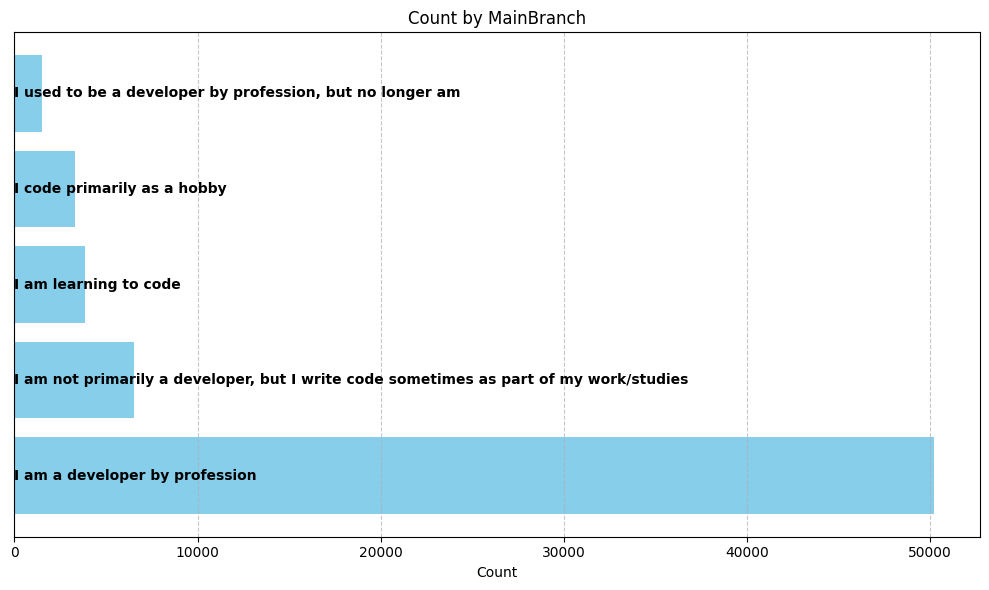

In [82]:
QUERY = """
SELECT MainBranch, COUNT (*) AS Count
FROM main
WHERE MainBranch IS NOT NULL
GROUP BY MainBranch
ORDER BY Count DESC
"""
W=pd.read_sql_query(QUERY,conn)
W.head(10)

plt.figure(figsize=(10, 6))
bars = plt.barh(W["MainBranch"], W["Count"], color='skyblue')
plt.yticks([])
for bar, label in zip(bars, W["MainBranch"]):
    plt.text(3, bar.get_y() + bar.get_height()/2, label, va='center', ha='left', color='black', fontsize=10, fontweight='bold')
plt.xlabel('Count')
plt.title('Count by MainBranch')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [83]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
